In [1]:
import pandas as pd
from pathlib import Path
from matplotlib import style
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf

%matplotlib inline
style.use("fivethirtyeight")

In [2]:
path = Path.home() / 'PycharmProjects/data_toolkit/stats/data'
data = pd.read_csv(path / 'billboard_impact.csv')
data.head()

,deposits,poa,jul
0,42,1,0
1,0,1,0
2,52,1,0
3,119,1,0
4,21,1,0


# DID Estimator

In [3]:
poa_before = data.query('poa == 1 & jul == 0')['deposits'].mean()
poa_after = data.query('poa == 1 & jul == 1')['deposits'].mean()
fl_before = data.query('poa==0 & jul==0')['deposits'].mean()
fl_after = data.query('poa==0 & jul==1')['deposits'].mean()

diff_in_diff = (poa_after-poa_before)-(fl_after-fl_before)
diff_in_diff

6.524557692307688

In [4]:
# smf.ols('deposits ~ poa * jul', data=data).fit().summary().tables[1]

Diff-in-Diff is telling us that we should expect deposits to increase by R$ 6.52 per customer. Notice that the assumption that diff-in-diff makes is much more plausible than the other 2 estimators. It just assumes that the growth pattern between the 2 cities are the same. But it doesn't require them to have the same base level nor does it require the trend to be zero.

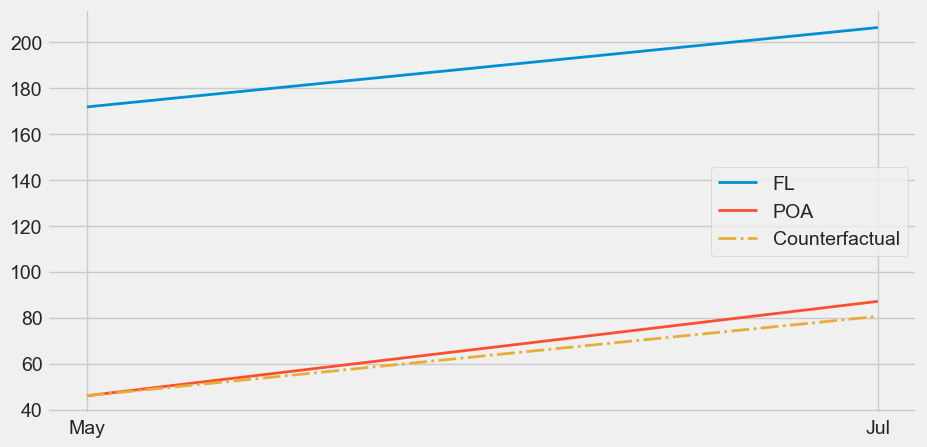

In [5]:
plt.figure(figsize=(10,5))
plt.plot(['May', 'Jul'], [fl_before, fl_after], label='FL', lw=2)
plt.plot(['May', 'Jul'], [poa_before, poa_after], label='POA', lw=2)
plt.plot(['May', 'Jul'], [poa_before, poa_before + (fl_after - fl_before)], label='Counterfactual', lw=2, color='C2', ls='-.')
plt.legend()

# Non Parallel Trends
One obvious problem with Diff-in-Diff is failure to satisfy the parallel trend assumption. If the growth trend from the treated is different from the trend of the control, diff-in-diff will be biased.

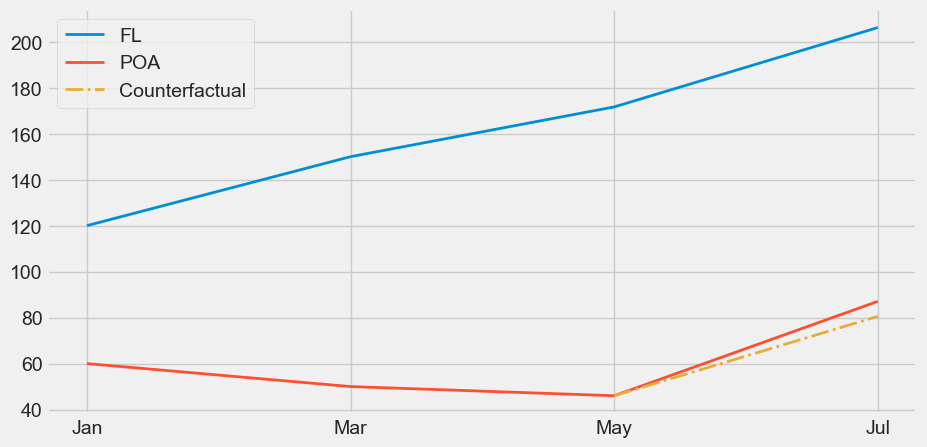

In [6]:
plt.figure(figsize=(10,5))
x = ['Jan', 'Mar', 'May', 'Jul']
plt.plot(x, [120, 150, fl_before,  fl_after], label='FL', lw=2)
plt.plot(x, [60, 50, poa_before, poa_after], label='POA', lw=2)
plt.plot(['May', 'Jul'], [poa_before, poa_before + (fl_after - fl_before)], label='Counterfactual', lw=2, color='C2', ls='-.')
plt.legend()